In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('viajes-en-tren-sample.csv')

In [3]:
data

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,vehicle_code,price,fare,seats,meta,insert_date
0,82060702,renfe,BARCELONA,MADRID,2022-06-25 05:50:00.000,2022-06-25 09:09:48.000,3.33,AVE,Estándar,3062,79.60,Básico,148.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 79...",2022-06-21 06:00:00.000
1,82060703,renfe,BARCELONA,MADRID,2022-06-25 06:35:00.000,2022-06-25 09:20:00.000,2.75,AVLO,Turista,6302,109.00,Básica,56.0,"{""Turista"": {""B\u00e1sica"": {""price"": 109.0, ""...",2022-06-21 06:00:00.000
2,82060704,renfe,BARCELONA,MADRID,2022-06-25 08:00:00.000,2022-06-25 11:12:00.000,3.20,AVE,Estándar,3082,102.35,Básico,73.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 10...",2022-06-21 06:00:00.000
3,82060705,renfe,BARCELONA,MADRID,2022-06-25 09:00:00.000,2022-06-25 11:45:00.000,2.75,AVE,Estándar,3092,79.60,Básico,65.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 79...",2022-06-21 06:00:00.000
4,82060706,renfe,BARCELONA,MADRID,2022-06-25 09:03:00.000,2022-06-25 18:09:00.000,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,"{""Turista"": {""Adulto ida"": {""price"": 43.25, ""s...",2022-06-21 06:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,82205263,renfe,ZARAGOZA,MADRID,2022-07-09 14:25:00.000,2022-07-09 15:44:48.000,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 52...",2022-06-23 00:00:00.000
144262,82205265,renfe,ZARAGOZA,MADRID,2022-07-09 16:26:00.000,2022-07-09 17:45:12.000,1.32,AVE,Estándar,3152,52.40,Básico,251.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 52...",2022-06-23 00:00:00.000
144263,82205267,renfe,ZARAGOZA,MADRID,2022-07-09 17:45:00.000,2022-07-09 19:12:00.000,1.45,AVE,Estándar,3162,58.20,Básico,158.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 58...",2022-06-23 00:00:00.000
144264,82205269,renfe,ZARAGOZA,MADRID,2022-07-09 20:45:00.000,2022-07-09 22:07:12.000,1.37,AVE,Estándar,3192,58.20,Básico,176.0,"{""Est\u00e1ndar"": {""B\u00e1sico"": {""price"": 58...",2022-06-23 00:00:00.000


In [4]:
data.shape

(144266, 15)

In [5]:
data.dtypes

id                 int64
company           object
origin            object
destination       object
departure         object
arrival           object
duration         float64
vehicle_type      object
vehicle_class     object
vehicle_code       int64
price            float64
fare              object
seats            float64
meta              object
insert_date       object
dtype: object

In [6]:
#Coverting 'insert_date','departure','arrival' into datetime

In [7]:
for i in ['insert_date','departure','arrival']:
    data[i] = pd.to_datetime(data[i])
data.dtypes

id                        int64
company                  object
origin                   object
destination              object
departure        datetime64[ns]
arrival          datetime64[ns]
duration                float64
vehicle_type             object
vehicle_class            object
vehicle_code              int64
price                   float64
fare                     object
seats                   float64
meta                     object
insert_date      datetime64[ns]
dtype: object

In [8]:
#Checking null values

In [9]:
data.isnull().sum()

id                0
company           0
origin            0
destination       0
departure         0
arrival           0
duration          0
vehicle_type      0
vehicle_class    30
vehicle_code      0
price            30
fare             30
seats            30
meta              0
insert_date       0
dtype: int64

In [10]:
#Dropping duplicates

In [11]:
data = data.drop_duplicates()

In [12]:
#Filling null values

#We will fill the train class, fare and seats columns with mode.
#We will fill the price according to fare column.

In [13]:
cols = ['vehicle_class','fare','seats']
for c in cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [14]:
data.loc[data.price.isnull(), 'price'] = data.groupby('fare').price.transform('mean')

In [15]:
#Checign again for null values

In [16]:
data.isnull().sum()

id               0
company          0
origin           0
destination      0
departure        0
arrival          0
duration         0
vehicle_type     0
vehicle_class    0
vehicle_code     0
price            0
fare             0
seats            0
meta             0
insert_date      0
dtype: int64

In [17]:
value_counts = data['company'].value_counts()
print(value_counts)

renfe    144266
Name: company, dtype: int64


In [18]:
#Removing not needed columns like 'id', 'company', 'insert_date', 'meta'

In [19]:
data.drop(['id'], axis = 1, inplace = True)
data.drop(['company'], axis = 1, inplace = True)
data.drop(["insert_date"], axis = 1, inplace = True)
data.drop(["meta"], axis = 1, inplace = True)

In [20]:
data

,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,vehicle_code,price,fare,seats
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0
...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0


In [21]:
#Checking unique values of 'origin' and 'destination' columns

In [22]:
data['origin'].unique()

array(['BARCELONA', 'CORDOBA', 'LEON', 'MADRID', 'MALAGA', 'SEVILLA',
       'VALENCIA', 'VALLADOLID', 'ZARAGOZA'], dtype=object)

In [23]:
data['destination'].unique()

array(['MADRID', 'VALENCIA', 'ZARAGOZA', 'BARCELONA', 'CORDOBA', 'LEON',
       'MALAGA', 'SEVILLA', 'VALLADOLID'], dtype=object)

In [24]:
#Add a column with trip distance - it will allow us to differentiate routes
#Because there are only few routes, we can treat this variable as a string, not necessarily as a continuous one

In [25]:
#Create a dictionary with stations cordinates
coordinates = {'MADRID':[40.4065,3.6896],\
               'SEVILLA':[37.3911,5.9755],\
               'MALAGA':[36.4242,4.2555],\
               'BARCELONA':[41.3790,2.1399],\
               'VALENCIA':[39.4666,0.3773],\
               'CORDOBA':[37.5319,4.4722],\
               'ZARAGOZA':[41.3931,0.5440],\
               'VALLADOLID':[41.3831,4.4337],\
               'LEON':[42.3542,5.3455]}

In [26]:
# create columns with origin and destination coordinates
data['origin_coordinates'] = data['origin'].apply(lambda x: coordinates[x])
data['destination_coordinates'] = data['destination'].apply(lambda x: coordinates[x])


In [27]:
data

,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,vehicle_code,price,fare,seats,origin_coordinates,destination_coordinates
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,"[41.379, 2.1399]","[40.4065, 3.6896]"
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,"[41.379, 2.1399]","[40.4065, 3.6896]"
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,"[41.379, 2.1399]","[40.4065, 3.6896]"
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,"[41.379, 2.1399]","[40.4065, 3.6896]"
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,"[41.379, 2.1399]","[40.4065, 3.6896]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,"[41.3931, 0.544]","[40.4065, 3.6896]"
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,"[41.3931, 0.544]","[40.4065, 3.6896]"
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,"[41.3931, 0.544]","[40.4065, 3.6896]"
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,"[41.3931, 0.544]","[40.4065, 3.6896]"


In [28]:
#calculate distance

In [29]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    
    return d

In [30]:
# create the distance function

In [31]:
import math

data['distance (km)'] = data.apply(lambda row: distance(row['origin_coordinates'],row['destination_coordinates']), axis=1)

In [32]:
data['distance (km)'].describe()

count    144266.000000
mean        244.719858
std          98.888740
min         125.315184
25%         133.147615
50%         259.758539
75%         326.718534
max         445.544707
Name: distance (km), dtype: float64

In [33]:
data

,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,vehicle_code,price,fare,seats,origin_coordinates,destination_coordinates,distance (km)
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,"[41.379, 2.1399]","[40.4065, 3.6896]",169.292800
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,"[41.379, 2.1399]","[40.4065, 3.6896]",169.292800
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,"[41.379, 2.1399]","[40.4065, 3.6896]",169.292800
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,"[41.379, 2.1399]","[40.4065, 3.6896]",169.292800
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,"[41.379, 2.1399]","[40.4065, 3.6896]",169.292800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,"[41.3931, 0.544]","[40.4065, 3.6896]",286.213946
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,"[41.3931, 0.544]","[40.4065, 3.6896]",286.213946
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,"[41.3931, 0.544]","[40.4065, 3.6896]",286.213946
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,"[41.3931, 0.544]","[40.4065, 3.6896]",286.213946


In [34]:
data = data.drop(columns=['origin_coordinates','destination_coordinates'])

In [35]:
data

,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km)
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.292800
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.292800
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.292800
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.292800
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.292800
...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,286.213946
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,286.213946
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,286.213946
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,286.213946


In [36]:
#rename duration column to make it more clear to the audience

In [37]:
data.rename(columns={'duration': 'duration(hours)'}, inplace=True)


In [38]:
data

,origin,destination,departure,arrival,duration(hours),vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km)
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.292800
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.292800
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.292800
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.292800
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.292800
...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,286.213946
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,286.213946
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,286.213946
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,286.213946


In [39]:
#create variables to reflect seasonal price movements

In [40]:
data['month'] = data['departure'].dt.month
data['weekday'] = data['departure'].dt.weekday
data['day'] = data['departure'].dt.day
data['hour'] = data['departure'].dt.hour
data['minute'] = data['departure'].dt.minute

In [41]:
data.head()

,origin,destination,departure,arrival,duration(hours),vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km),month,weekday,day,hour,minute
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.2928,6,5,25,5,50
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.2928,6,5,25,6,35
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.2928,6,5,25,8,0
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.2928,6,5,25,9,0
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.2928,6,5,25,9,3


In [42]:
# create a column with origin and destination (this variable is effectively equivalent to the distance one)
data['origin - destination'] = data['origin']+' - '+data['destination']

In [43]:
data

,origin,destination,departure,arrival,duration(hours),vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km),month,weekday,day,hour,minute,origin - destination
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.292800,6,5,25,5,50,BARCELONA - MADRID
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.292800,6,5,25,6,35,BARCELONA - MADRID
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.292800,6,5,25,8,0,BARCELONA - MADRID
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.292800,6,5,25,9,0,BARCELONA - MADRID
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.292800,6,5,25,9,3,BARCELONA - MADRID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,286.213946,7,5,9,14,25,ZARAGOZA - MADRID
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,286.213946,7,5,9,16,26,ZARAGOZA - MADRID
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,286.213946,7,5,9,17,45,ZARAGOZA - MADRID
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,286.213946,7,5,9,20,45,ZARAGOZA - MADRID


In [44]:
data.dtypes

origin                          object
destination                     object
departure               datetime64[ns]
arrival                 datetime64[ns]
duration(hours)                float64
vehicle_type                    object
vehicle_class                   object
vehicle_code                     int64
price                          float64
fare                            object
seats                          float64
distance (km)                  float64
month                            int64
weekday                          int64
day                              int64
hour                             int64
minute                           int64
origin - destination            object
dtype: object

In [45]:
#Some analysis about the prices

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

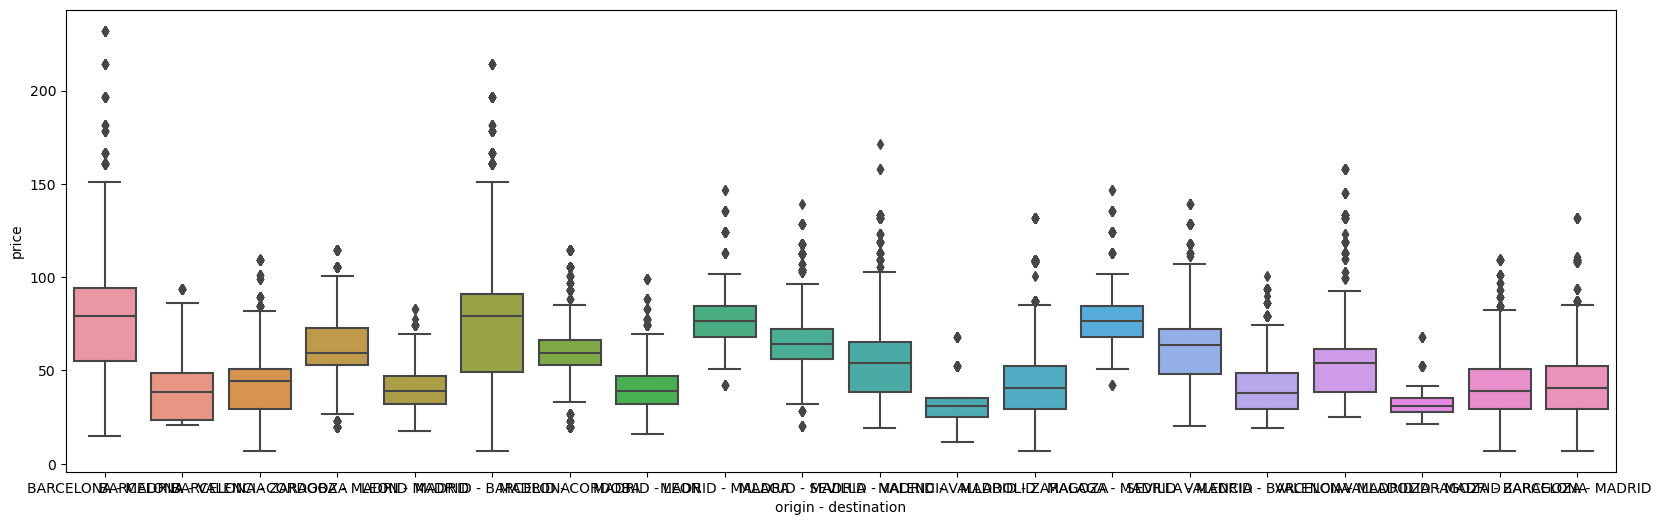

In [47]:
# price by journey
f,ax = plt.subplots(figsize=(20,6))
ax = sns.boxplot(x='origin - destination',y='price',data=data)
plt.show()

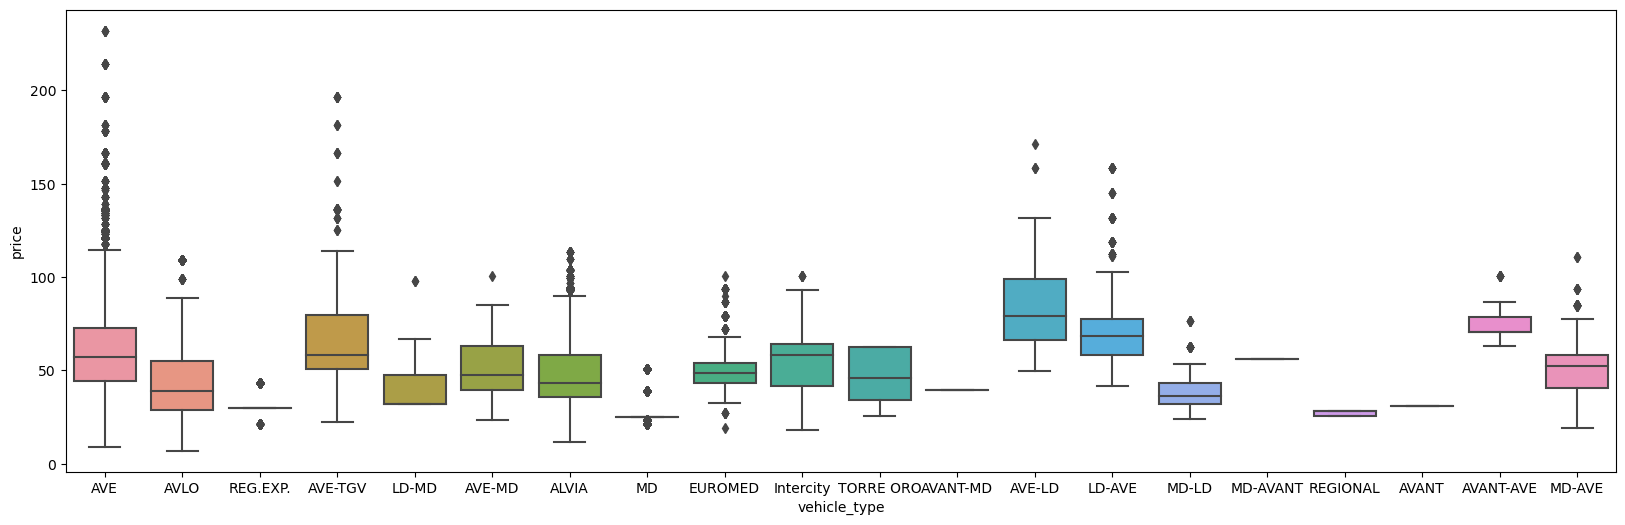

In [48]:
# price by type of train
f,ax = plt.subplots(figsize=(20,6))
ax = sns.boxplot(x='vehicle_type',y='price',data=data)
plt.show()

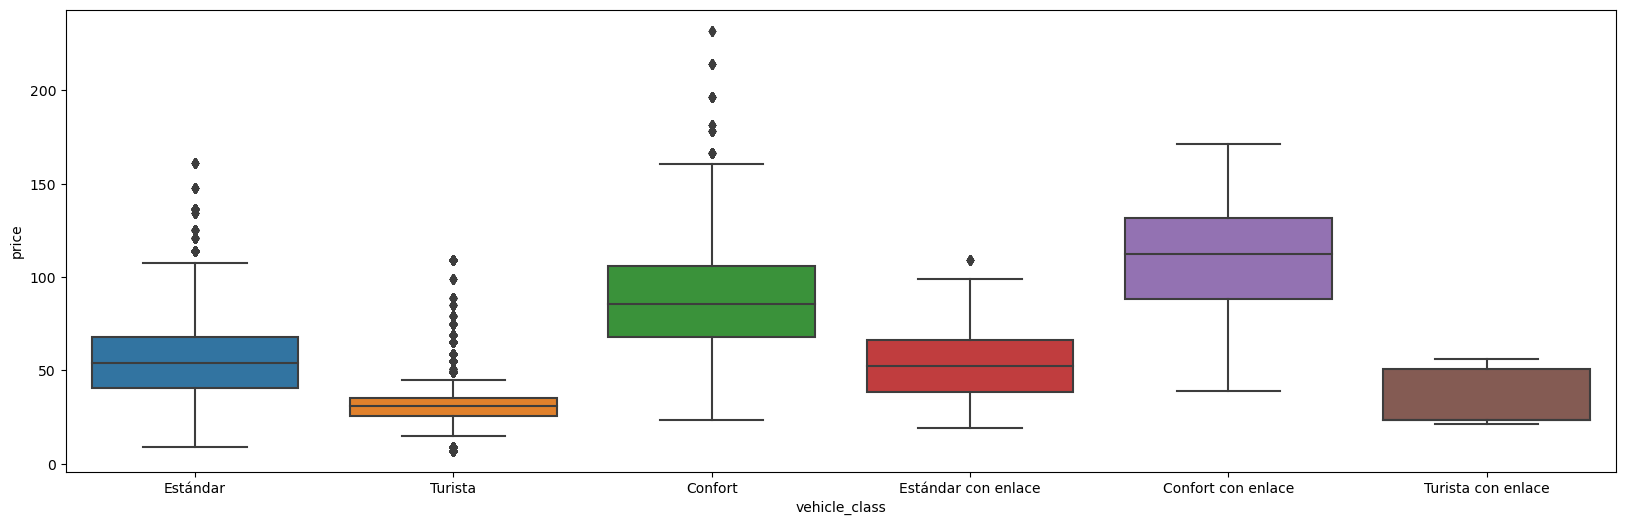

In [49]:
#price by type of class
f,ax = plt.subplots(figsize=(20,6))
ax = sns.boxplot(x='vehicle_class',y='price',data=data)
plt.show()


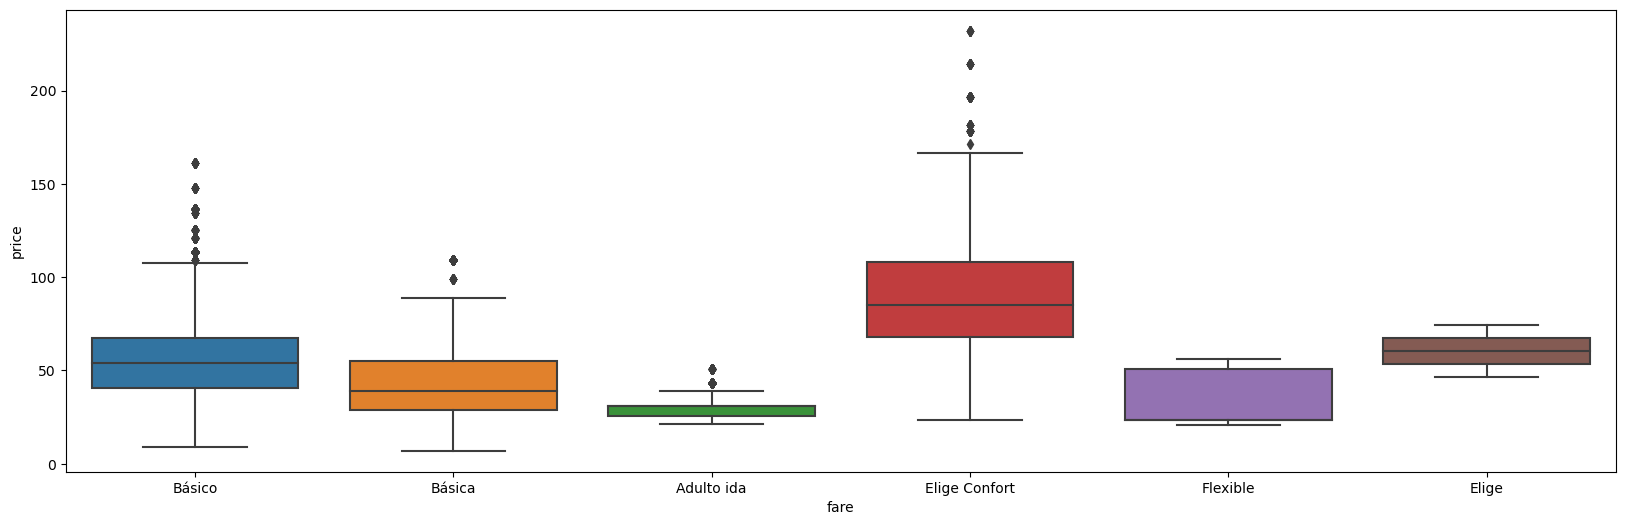

In [50]:
# price by category type
f,ax = plt.subplots(figsize=(20,6))
ax = sns.boxplot(x='fare',y='price',data=data)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25504\2576739758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['price'])


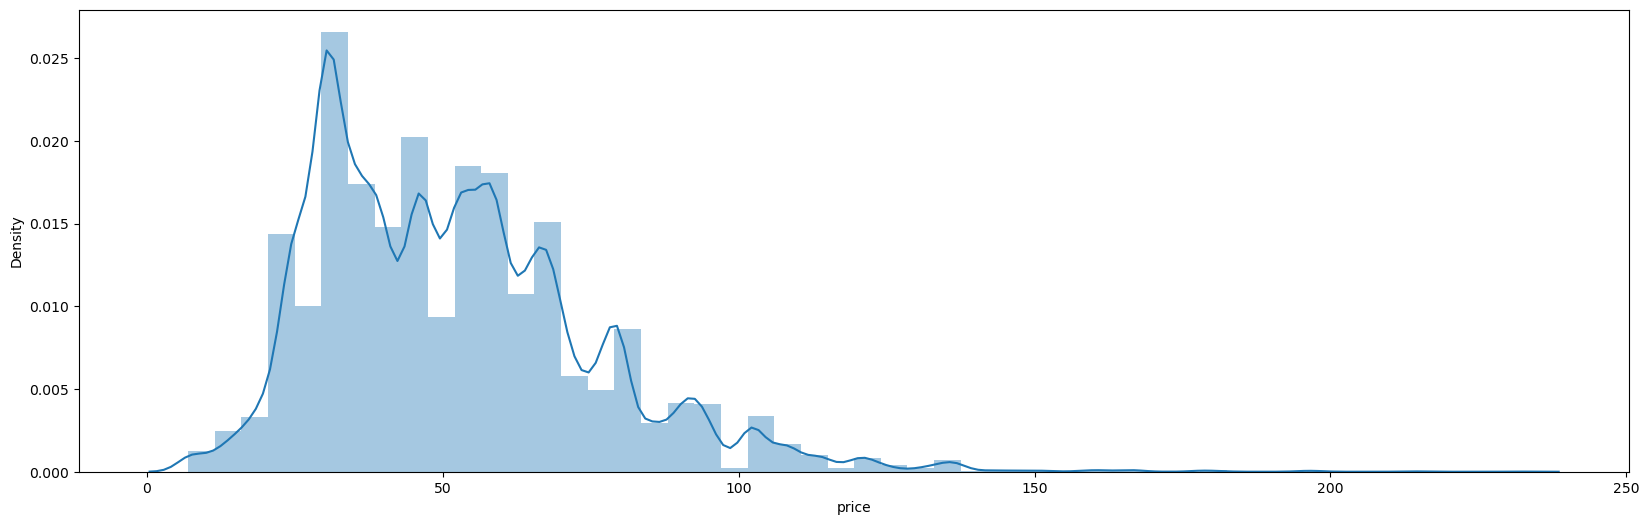

In [51]:
# price distribution
f,ax = plt.subplots(figsize=(20,6))
ax = sns.distplot(data['price'])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25504\1095802069.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.get_dummies(data).corr(), annot=False, cmap = "Greens", linewidths=.5, fmt= '.2f',ax = ax)


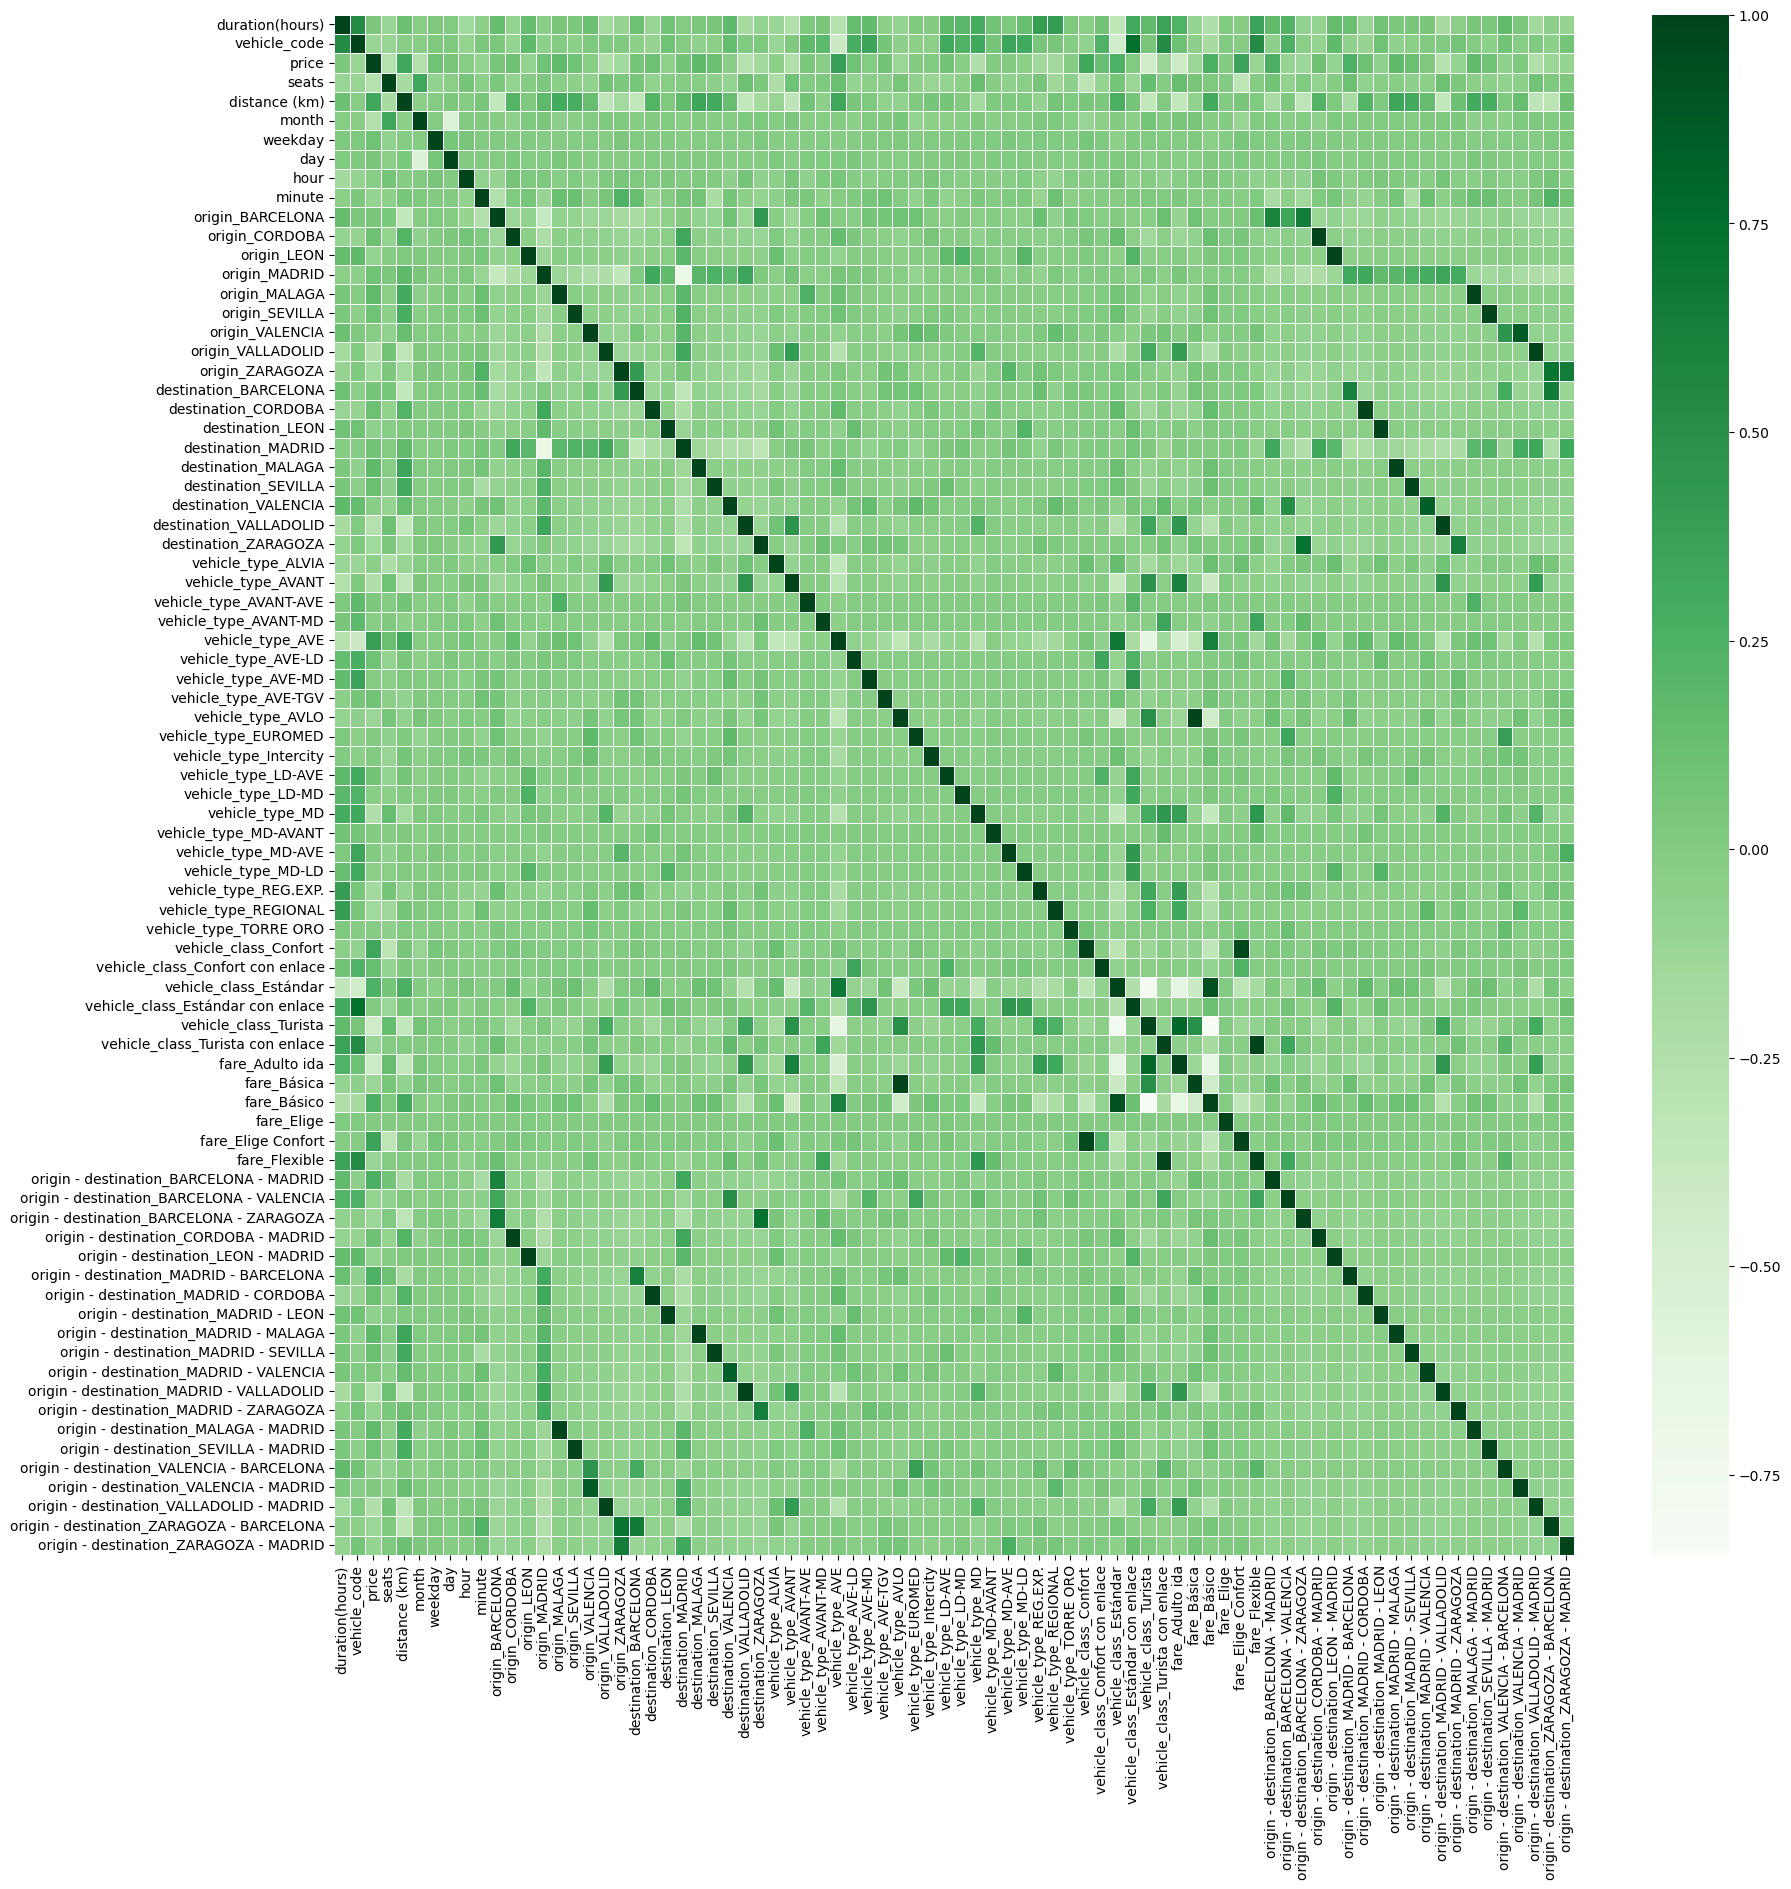

In [52]:
# correlation plot
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(pd.get_dummies(data).corr(), annot=False, cmap = "Greens", linewidths=.5, fmt= '.2f',ax = ax)
plt.show()


In [53]:
#Some analysis by vehicle_type and vehicle_class

In [54]:
data.groupby(['origin - destination','vehicle_type'])['vehicle_type'].count()

origin - destination  vehicle_type
BARCELONA - MADRID    AVE             6648
                      AVE-TGV          469
                      AVLO            1767
                      LD-MD             74
                      REG.EXP.         476
                                      ... 
ZARAGOZA - MADRID     LD-MD             74
                      MD-AVE           821
                      MD-LD             57
                      REG.EXP.         476
                      REGIONAL         476
Name: vehicle_type, Length: 114, dtype: int64

In [55]:
data.groupby(['fare','vehicle_type'])['vehicle_type'].count()

fare           vehicle_type
Adulto ida     AVANT           10078
               MD               6158
               REG.EXP.         4739
               REGIONAL         2849
Básica         AVLO            10950
Básico         ALVIA           11151
               AVANT-AVE         202
               AVE             76447
               AVE-LD            430
               AVE-MD            973
               AVE-TGV          2720
               EUROMED          1254
               Intercity        3947
               LD-AVE            615
               LD-MD             451
               MD-AVE            922
               MD-LD             731
               TORRE ORO          67
Elige          AVE                 1
               LD-AVE              1
Elige Confort  ALVIA            1626
               AVANT-AVE          12
               AVE              4638
               AVE-LD            180
               AVE-MD             28
               AVE-TGV           123
          

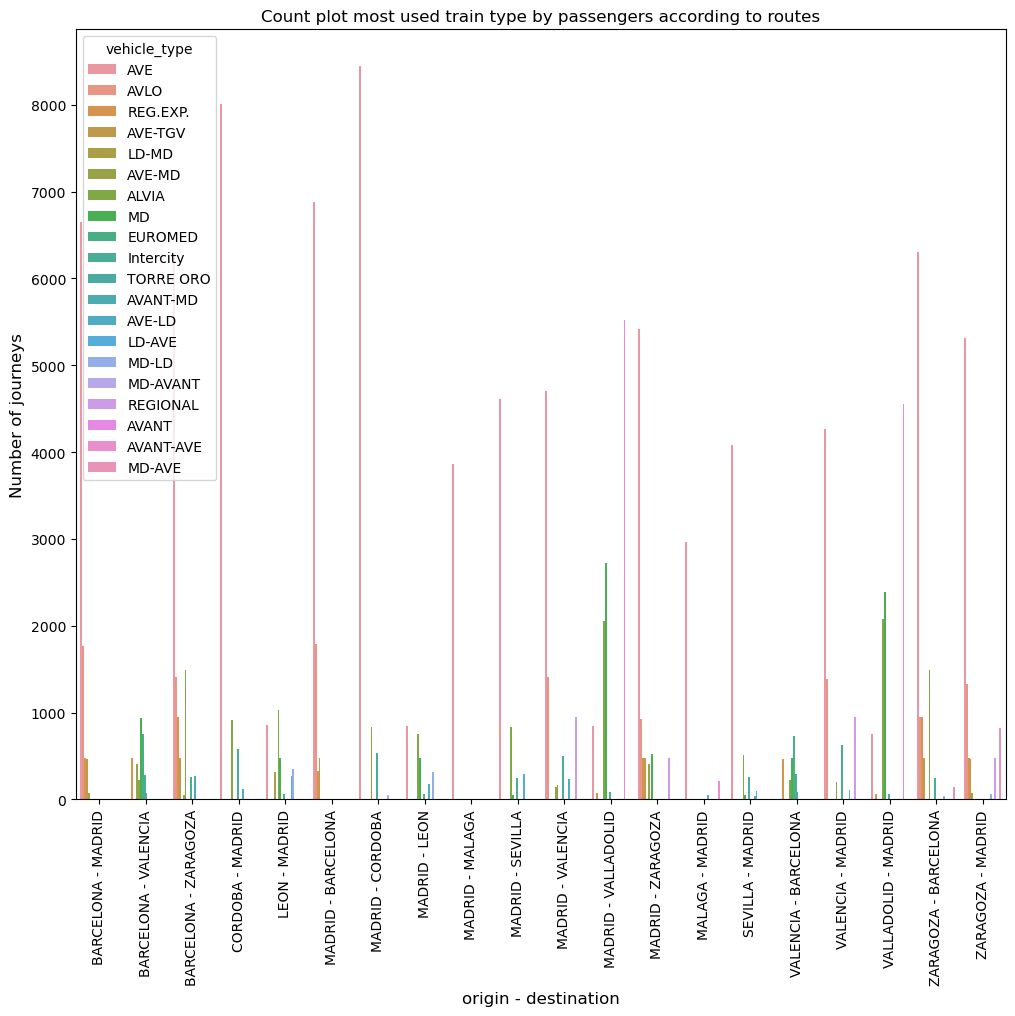

In [56]:
plt.figure(figsize=(12,10))
sns.countplot(x= 'origin - destination', hue = 'vehicle_type', data = data,alpha=1.0,linewidth=5)
plt.title('Count plot most used train type by passengers according to routes')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('origin - destination', fontsize=12)
plt.show()

In [57]:
#AVE is the most common type of train used by passengers

In [58]:
data.groupby(['origin - destination','vehicle_class'])['vehicle_class'].count()

origin - destination  vehicle_class      
BARCELONA - MADRID    Confort                 638
                      Confort con enlace        3
                      Estándar               6479
                      Estándar con enlace      71
                      Turista                2243
                                             ... 
ZARAGOZA - MADRID     Confort                 619
                      Confort con enlace       46
                      Estándar               5163
                      Estándar con enlace     906
                      Turista                2283
Name: vehicle_class, Length: 87, dtype: int64

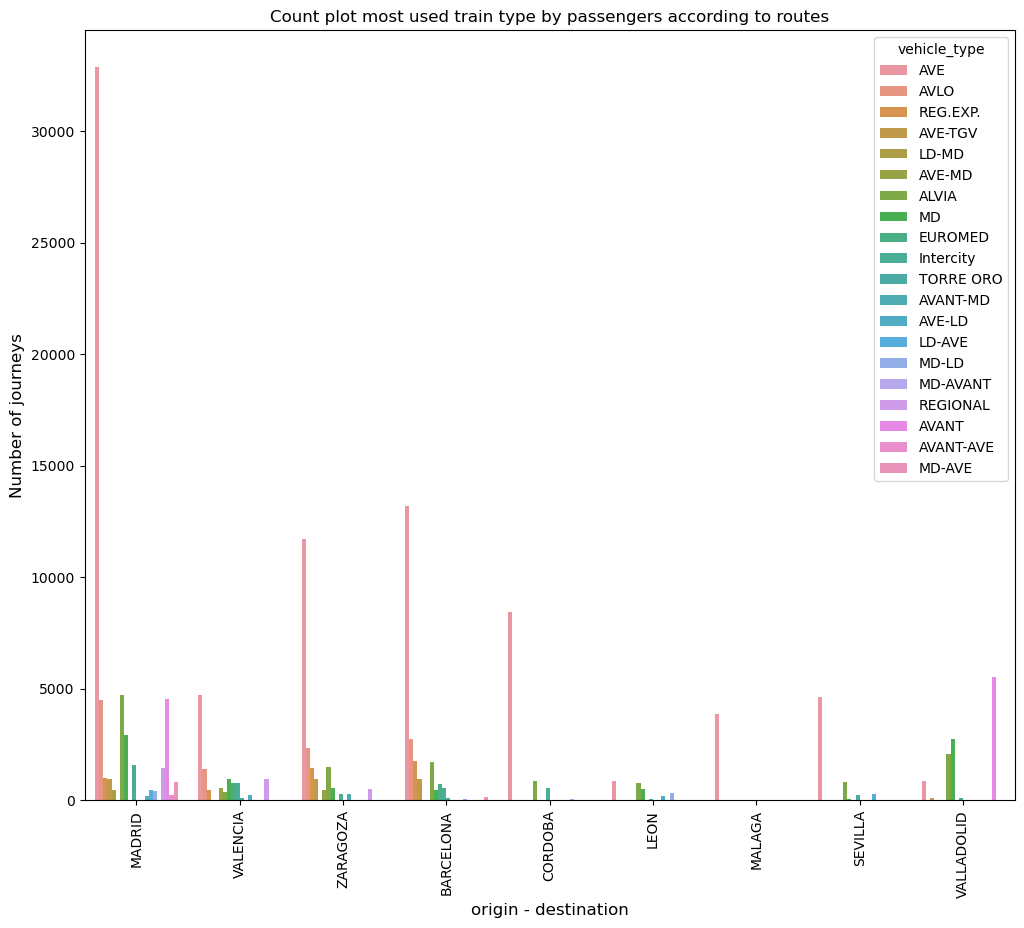

In [59]:
plt.figure(figsize=(12,10))
sns.countplot(x= 'destination', hue = 'vehicle_type', data = data,alpha=1.0,linewidth=5)
plt.title('Count plot most used train type by passengers according to routes')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('origin - destination', fontsize=12)
plt.show()

In [60]:
#On this plot you can see that AVE is the most common type of train used in every route

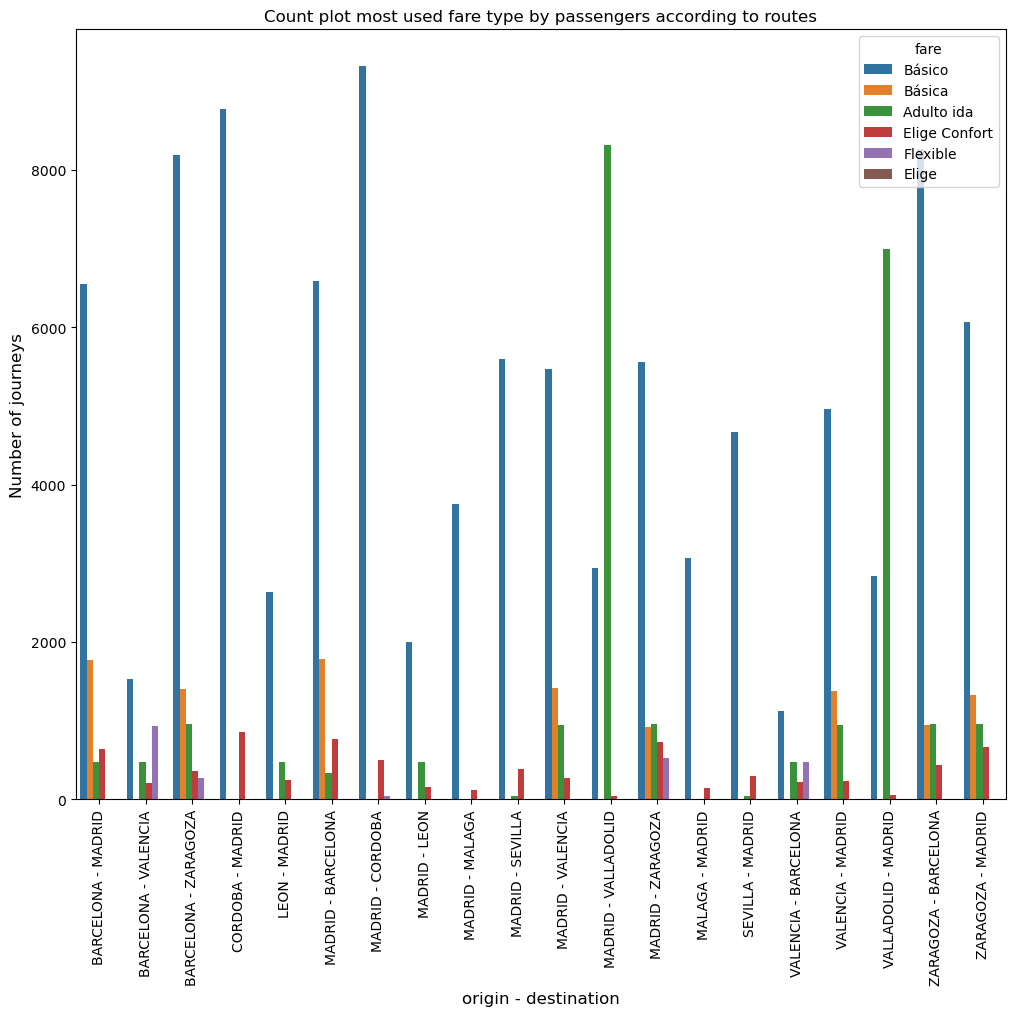

In [61]:
plt.figure(figsize=(12,10))
sns.countplot(x= 'origin - destination', hue = 'fare', data = data,alpha=1.0,linewidth=5)
plt.title('Count plot most used fare type by passengers according to routes')
plt.xticks(rotation='vertical')
plt.ylabel('Number of journeys', fontsize=12)
plt.xlabel('origin - destination', fontsize=12)
plt.show()

In [62]:
#On this plot you can see that Básico is the most common fare used in every route

In [63]:
import matplotlib.pyplot as plt


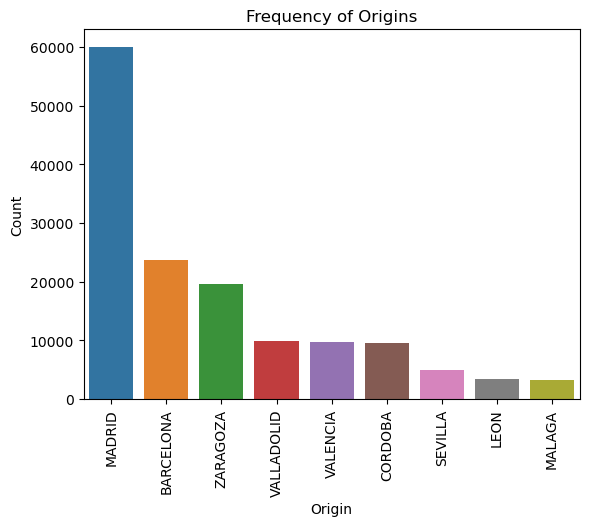

In [64]:
ax = sns.barplot(x=data['origin'].value_counts().index, y=data['origin'].value_counts())
ax.set(xlabel='Origin', ylabel='Count')
plt.title('Frequency of Origins')
plt.xticks(rotation=90)  
plt.show()

In [65]:
#Most common origin is Madrid

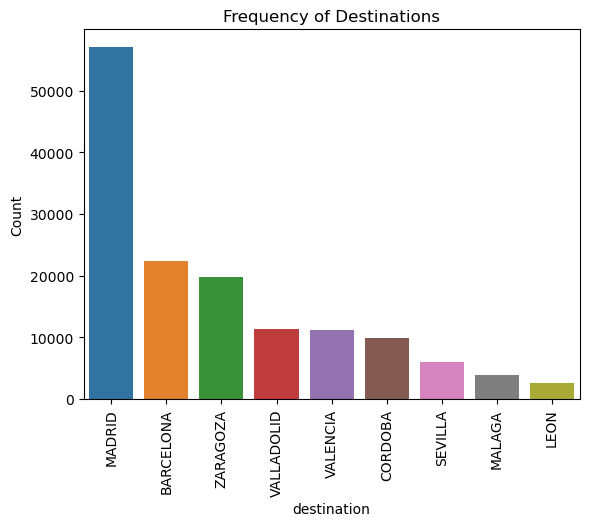

In [66]:
ax = sns.barplot(x=data['destination'].value_counts().index, y=data['destination'].value_counts())
ax.set(xlabel='destination', ylabel='Count')
plt.title('Frequency of Destinations')
plt.xticks(rotation=90)  
plt.show()

In [67]:
#Most common destination is Madrid

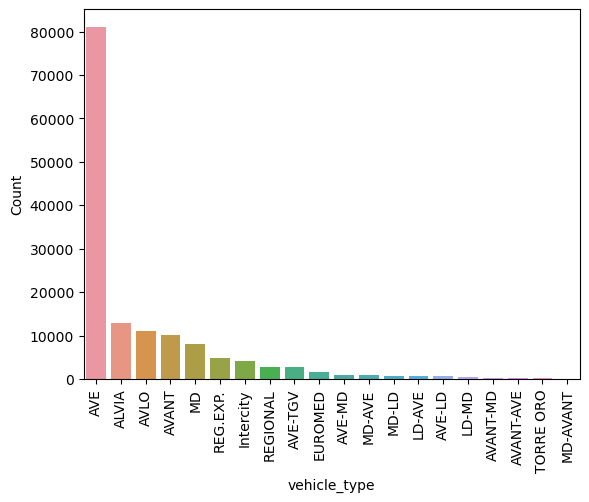

In [68]:
ax = sns.barplot(x=data['vehicle_type'].value_counts().index, y=data['vehicle_type'].value_counts())
ax.set(xlabel='vehicle_type', ylabel='Count')
plt.xticks(rotation=90)  
plt.show()

In [69]:
#Most train used is AVE

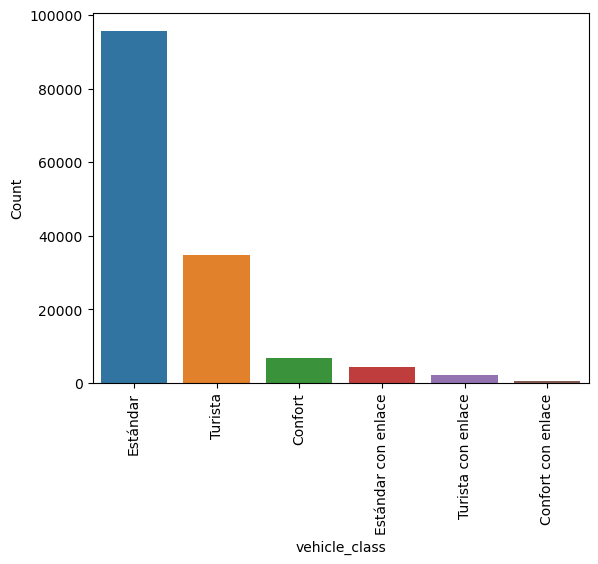

In [70]:
ax = sns.barplot(x=data['vehicle_class'].value_counts().index, y=data['vehicle_class'].value_counts())
ax.set(xlabel='vehicle_class', ylabel='Count')
plt.xticks(rotation=90)  
plt.show()

In [71]:
#Most train class use is standard

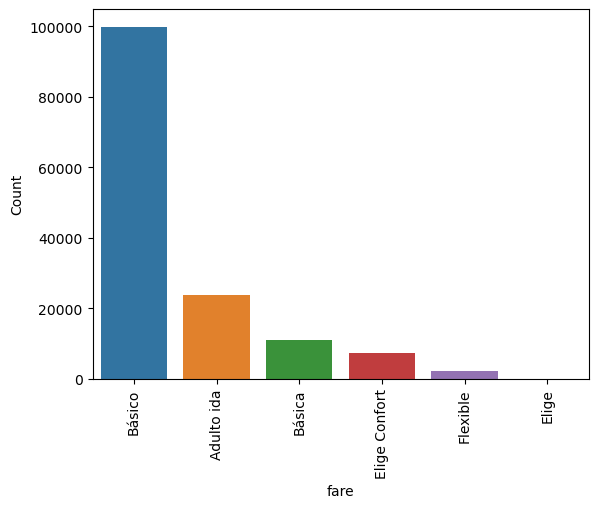

In [72]:
ax = sns.barplot(x=data['fare'].value_counts().index, y=data['fare'].value_counts())
ax.set(xlabel='fare', ylabel='Count')
plt.xticks(rotation=90)  
plt.show()

In [73]:
#Most common fare used is: Básico

In [74]:
#Double checkign dataset before start modeling

In [75]:
data

,origin,destination,departure,arrival,duration(hours),vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km),month,weekday,day,hour,minute,origin - destination
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.292800,6,5,25,5,50,BARCELONA - MADRID
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.292800,6,5,25,6,35,BARCELONA - MADRID
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.292800,6,5,25,8,0,BARCELONA - MADRID
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.292800,6,5,25,9,0,BARCELONA - MADRID
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.292800,6,5,25,9,3,BARCELONA - MADRID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,286.213946,7,5,9,14,25,ZARAGOZA - MADRID
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,286.213946,7,5,9,16,26,ZARAGOZA - MADRID
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,286.213946,7,5,9,17,45,ZARAGOZA - MADRID
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,286.213946,7,5,9,20,45,ZARAGOZA - MADRID


In [76]:
#Data Modelling

In [77]:
# target variable
y = data['price']
X = data.drop('price', axis=1)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(115412, 17)
(28854, 17)
(115412,)
(28854,)


In [80]:
num_cols = X.select_dtypes(np.number).columns.tolist()
cat_cols = X.select_dtypes(object).columns.tolist()

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [82]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')
X_train_cat_encoded = enc.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = enc.transform(X_test_cat).toarray()
column_names = enc.get_feature_names_out(X_train_cat.columns)

In [83]:
X_train = pd.concat([pd.DataFrame(X_train_num_scaled, columns=X_train_num.columns), pd.DataFrame(X_train_cat_encoded, columns=column_names)], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_num_scaled, columns=X_test_num.columns), pd.DataFrame(X_test_cat_encoded, columns=column_names)], axis=1)

In [84]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6516547822668846

In [86]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.6512238985147284

In [87]:
#pip install lightgbm

In [88]:
#Using gradient boost model

In [89]:
from lightgbm import LGBMRegressor
import sklearn

In [90]:
gbr = LGBMRegressor(n_estimators=6000)
gbr.fit(X_train, y_train)

LGBMRegressor(n_estimators=6000)

In [91]:
gbr.score(X_train, y_train)

0.9939562894518696

In [92]:
gbr.score(X_test, y_test)

0.9850740112239573

In [120]:
X_test_predictions = gbr.predict(X_test)

In [121]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,X_test_predictions)

0.9850740112239573

In [93]:
#Using LinearRegression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [96]:
lr.score(X_test,y_test)

0.6512238985147284

In [97]:
y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import r2_score, mean_squared_error


r2_score(y_test, y_pred)

0.6512238985147284

In [99]:
mean_squared_error(y_test, y_pred)

189.2395620830311

In [100]:
#Using XGBRegressor

In [101]:
#pip install xgboost

In [102]:
from xgboost import XGBRegressor


xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_pred = xgb_regressor.predict(X_test)
print(f"R2 score for xgb model is {r2_score(y_test, xgb_pred)}")

R2 score for xgb model is 0.926603020000189


In [103]:
print(f"MSE for xgb model is {mean_squared_error(y_test, xgb_pred)}")

MSE for xgb model is 39.82386492145523


In [104]:
#Using RandomForest

In [105]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=120, 
                             max_depth=10, 
                             max_samples=0.2, 
                             random_state = 42)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print(f"Training score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

y_pred = clf.predict(X_test)

Training score: 0.85
Test score: 0.85


In [106]:
#Best result is LGBMRegressor - gbr.score(X_train, y_train) 0.9939562894518696

In [107]:
numerical =  X.select_dtypes(np.number)
categorical = X.select_dtypes(object)

In [108]:
num_scaled = pd.DataFrame(scaler.transform(numerical), columns = numerical.columns, index = numerical.index)

In [109]:
encoded = pd.DataFrame(enc.transform(categorical).toarray(), columns = column_names, index = categorical.index)

In [110]:
X_all = pd.concat([num_scaled, encoded], axis=1)

In [111]:
gbr.score(X_train, y_train)

0.9939562894518696

In [119]:
data['predicted_price']=gbr.predict(X_all)

In [122]:
data

,origin,destination,departure,arrival,duration(hours),vehicle_type,vehicle_class,vehicle_code,price,fare,seats,distance (km),month,weekday,day,hour,minute,origin - destination,predicted_price
0,BARCELONA,MADRID,2022-06-25 05:50:00,2022-06-25 09:09:48,3.33,AVE,Estándar,3062,79.60,Básico,148.0,169.292800,6,5,25,5,50,BARCELONA - MADRID,80.179846
1,BARCELONA,MADRID,2022-06-25 06:35:00,2022-06-25 09:20:00,2.75,AVLO,Turista,6302,109.00,Básica,56.0,169.292800,6,5,25,6,35,BARCELONA - MADRID,106.661249
2,BARCELONA,MADRID,2022-06-25 08:00:00,2022-06-25 11:12:00,3.20,AVE,Estándar,3082,102.35,Básico,73.0,169.292800,6,5,25,8,0,BARCELONA - MADRID,99.436206
3,BARCELONA,MADRID,2022-06-25 09:00:00,2022-06-25 11:45:00,2.75,AVE,Estándar,3092,79.60,Básico,65.0,169.292800,6,5,25,9,0,BARCELONA - MADRID,81.891668
4,BARCELONA,MADRID,2022-06-25 09:03:00,2022-06-25 18:09:00,9.10,REG.EXP.,Turista,17501,43.25,Adulto ida,207.0,169.292800,6,5,25,9,3,BARCELONA - MADRID,42.877605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144261,ZARAGOZA,MADRID,2022-07-09 14:25:00,2022-07-09 15:44:48,1.33,AVE-TGV,Estándar,19730,52.40,Básico,127.0,286.213946,7,5,9,14,25,ZARAGOZA - MADRID,50.204681
144262,ZARAGOZA,MADRID,2022-07-09 16:26:00,2022-07-09 17:45:12,1.32,AVE,Estándar,3152,52.40,Básico,251.0,286.213946,7,5,9,16,26,ZARAGOZA - MADRID,53.174450
144263,ZARAGOZA,MADRID,2022-07-09 17:45:00,2022-07-09 19:12:00,1.45,AVE,Estándar,3162,58.20,Básico,158.0,286.213946,7,5,9,17,45,ZARAGOZA - MADRID,58.246181
144264,ZARAGOZA,MADRID,2022-07-09 20:45:00,2022-07-09 22:07:12,1.37,AVE,Estándar,3192,58.20,Básico,176.0,286.213946,7,5,9,20,45,ZARAGOZA - MADRID,56.211617


In [115]:
round(data['price'].mean(),2)

51.7

In [123]:
round(data['predicted_price'].mean(),2)

51.7

In [124]:
data.to_csv('PricepredictionData.csv',index=False)

In [ ]:
#Some conclusions

In [125]:
print( "The max price of ticket was", data.price.max(), "Euros" )
print( "The min price of ticket was", data.price.min(), "Euros" )
print( "The average price of tickets was", np.round( data.price.mean(),2 ), "Euros" )

The max price of ticket was 232.05 Euros
The min price of ticket was 7.0 Euros
The average price of tickets was 51.7 Euros


In [128]:
origin = data.origin.unique()
destination = data.destination.unique()
cities = [next(iter(filter(None, values)), '') for values in zip(origin, destination)]
print( "These are the cities that have rail service register in our dataset", cities )

These are the cities that have rail service register in our dataset ['BARCELONA', 'CORDOBA', 'LEON', 'MADRID', 'MALAGA', 'SEVILLA', 'VALENCIA', 'VALLADOLID', 'ZARAGOZA']


In [132]:
print( "In average, the duration of the trip is ",round(data['minute'].mean(),2),"minute" )
print( "the longest tripes are ",round(data['minute'].max(),2),"minute" )
print( "The fastest trips are ",round(data['minute'].min(),2),"minute" )

In average, the duration of the trip is  25.63 minute
the longest tripes are  58 minute
The fastest trips are  0 minute


In [133]:
print( "The last date register was", data.departure.max())
print( "The first date register", data.departure.min())


The last date register was 2022-08-21 22:38:00
The first date register 2022-06-21 08:25:00


In [ ]:
#Creating a map of railway routes

In [134]:
!pip install geocoder

     ---------------------------------------- 98.6/98.6 kB 1.9 MB/s eta 0:00:00


In [136]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 2.9 MB/s eta 0:00:00


In [137]:
import geocoder
import folium

In [138]:
data = data.filter(["origin", "destination"])

In [139]:
data.filter(['origin', 'destination']).groupby(['origin', 'destination'], as_index=False).size().sort_values(['size'], ascending= False)[:5] 

,origin,destination,size
11,MADRID,VALLADOLID,11310
2,BARCELONA,ZARAGOZA,11177
18,ZARAGOZA,BARCELONA,10605
17,VALLADOLID,MADRID,9887
6,MADRID,CORDOBA,9866


In [140]:
route= data.filter(['origin', 'destination']).groupby(['origin', 'destination'], as_index=False).size().sort_values(['size'], ascending= False) 
origin= route['origin'].tolist()
destination= route['destination'].tolist()
or_dest_unique= route.origin.unique().tolist()

In [141]:
coord = []
for i in or_dest_unique:
    g = geocoder.osm(str(i +",  Spain"))
    coord.extend((str(i), g.osm['y'], g.osm['x']))

In [142]:
df = pd.DataFrame(columns = ['origin_lng', 'origin_lat', 'destination_lng', 'destination_lat'])
for i in range(len(origin)):
    s = []
    if origin[i] in coord:
        s.append(coord[coord.index(origin[i]) + 1])
        s.append(coord[coord.index(origin[i]) + 2])
    if destination[i] in coord:
        s.append(coord[coord.index(destination[i]) + 1])
        s.append(coord[coord.index(destination[i]) + 2])
    df.loc[i] = s
for i in df.columns.tolist():
    df[str(i)] = pd.to_numeric(df[str(i)])

In [143]:
df.head()

,origin_lng,origin_lat,destination_lng,destination_lat
0,40.416705,-3.703582,41.652133,-4.728562
1,41.382894,2.177432,41.652134,-0.880943
2,41.652134,-0.880943,41.382894,2.177432
3,41.652133,-4.728562,40.416705,-3.703582
4,40.416705,-3.703582,37.884581,-4.776014


In [144]:
centroid_lat = 40.208
centroid_lon = -3.713
m = folium.Map([centroid_lat, centroid_lon], zoom_start=5)
for i in range(len(df)):
    folium.CircleMarker(df.iloc[i][:2].tolist(),
                        radius=15,
                        fill_color="blue", 
                       ).add_child(folium.Popup(str(destination[i]))).add_to(m) # destination

    folium.CircleMarker(df.iloc[i][:2].tolist(),
                        radius=15,
                        fill_color="red", 
                       ).add_child(folium.Popup(str(origin[i]))).add_to(m) # origin

    folium.PolyLine([df.iloc[i][2:].tolist(), df.iloc[i][:2].tolist()],
               color="red").add_to(m)
    
m

In [145]:
df.to_csv('Mapofroutes.csv',index=False)